##Importing libraries

In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as shc
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler

## Load the data

In [590]:
Data=np.load("/content/test_data.npy",allow_pickle=True).item()

In [591]:
X,labels=Data ["data"],Data ["labels"]

##Plot functions

In [592]:
def plot_clusters(data,true_labels=None,title_tru="True_clusters"):
  for i in range(4):
    for j in range(i+1,4):
      plt.scatter(data[:,i],data[:,j],c=true_labels)
      plt.xlabel(f'Feature {i}')
      plt.ylabel(f'Feature {j}')
      plt.title(title_tru)
      plt.show()

def compare_plot(data,true_labels,cluster_labels,title_cluster):
  for i in range(4):
    for j in range(i+1,4):
      fig,ax=plt.subplots(1,2,figsize=(12,5))
      ax[0].scatter(data[:,i],data[:,j],c=true_labels)
      ax[0].set_title("Original Data with ground labels")
      ax[0].set_xlabel(f'Feature {i}')
      ax[0].set_ylabel(f'Feature {j}')
      ax[1].scatter(data[:,i],data[:,j],c=true_labels)
      ax[1].set_title("Predicted by "+title_cluster)
      ax[1].set_xlabel(f'Feature {i}')
      ax[1].set_ylabel(f'Feature {j}')
      plt.show()

# Hierarchical Agglomerative Clustering

In [593]:
S=StandardScaler()
scaled_x=S.fit_transform(X)

##Visualizing the data with ground labels

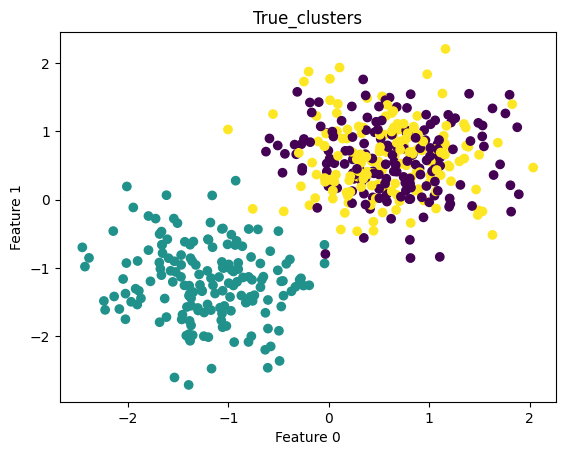

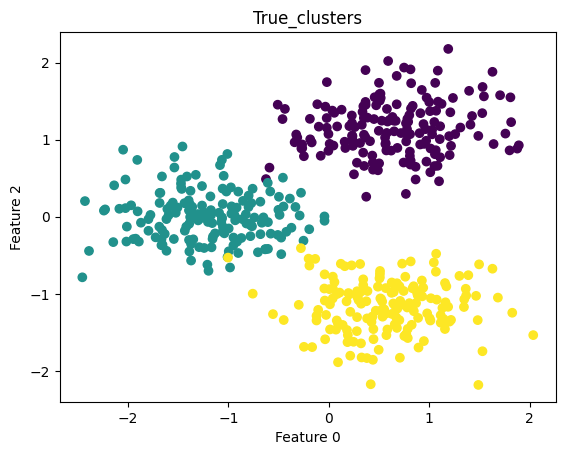

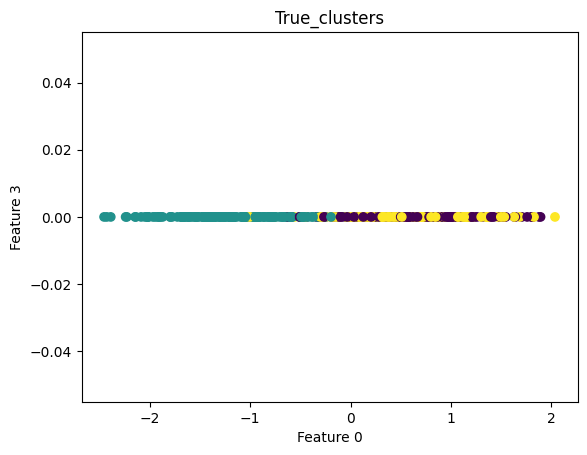

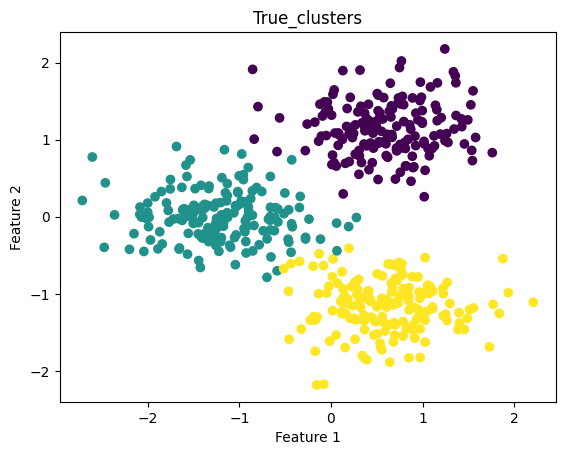

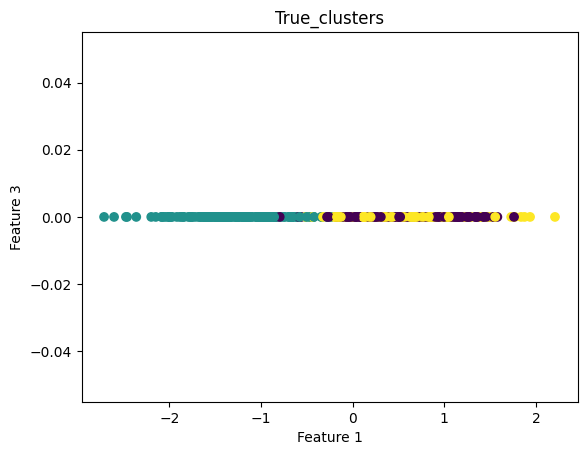

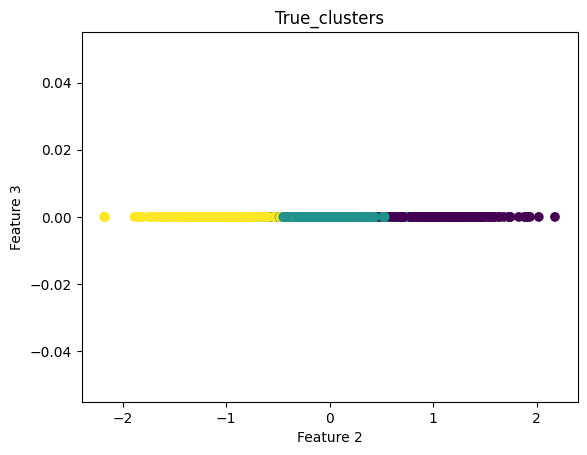

In [594]:
plot_clusters(data=scaled_x,true_labels=labels)

In [595]:
def get_best_cluster_number_hc(X,labels,clusters):
  R=0
  M=0
  CR=0
  CM=0
  best_labels_R=np.zeros(X.shape[0])
  best_labels_M=np.zeros(X.shape[0])
  for i in clusters:
    agg_cluster=AgglomerativeClustering(n_clusters=i,metric='euclidean',linkage='complete')
    agg_cluster.fit(X)
    pred_labels=agg_cluster.labels_
    rand_score=metrics.adjusted_rand_score(labels,pred_labels)
    mutual_info_score=metrics.adjusted_mutual_info_score(labels,pred_labels)
    print(f'For {i} clusters the rand_score is : {rand_score}')
    print(f'For {i} clusters the mutual_info_score is : {mutual_info_score}')
    if rand_score>R:
      CR=i
      R=rand_score
      best_labels_R=pred_labels
    if mutual_info_score>M:
      CM=i
      M=mutual_info_score
      best_labels_M=pred_labels
  return (R,CR,best_labels_R),(M,CM,best_labels_M)

In [596]:
clus=[1,2,3,4,5,6]#try several cluster and pick the one with highest mutual info score or rand index
A,B=get_best_cluster_number_hc(scaled_x,labels=labels,clusters=clus)

For 1 clusters the rand_score is : 0.0
For 1 clusters the mutual_info_score is : 0.0
For 2 clusters the rand_score is : 0.5711835334476844
For 2 clusters the mutual_info_score is : 0.7334012369626347
For 3 clusters the rand_score is : 1.0
For 3 clusters the mutual_info_score is : 1.0
For 4 clusters the rand_score is : 0.891353849423029
For 4 clusters the mutual_info_score is : 0.9149401169151868
For 5 clusters the rand_score is : 0.7681460488985477
For 5 clusters the mutual_info_score is : 0.8406746240013129
For 6 clusters the rand_score is : 0.6970602539070745
For 6 clusters the mutual_info_score is : 0.7991201552864633


## Best score and number of cluster by agglomerative clustering

In [597]:
print(f'best rand index score {A[0]} and number of clusters {A[1]}')
print(f'best mutual information score {B[0]} and number of clusters {B[1]}')

best rand index score 1.0 and number of clusters 3
best mutual information score 1.0 and number of clusters 3


## Silhouette Score corresponding to labels with max rand_score

In [598]:
s_hc=metrics.silhouette_score(scaled_x,A[2])
print(f'Silhouette score : {s_hc}')

Silhouette score : 0.5878535006929564


##Plot with Predicted Labels

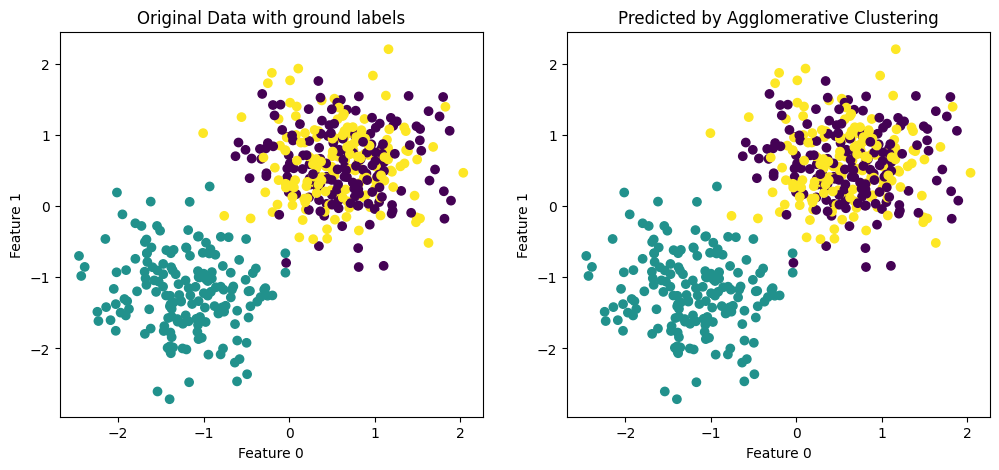

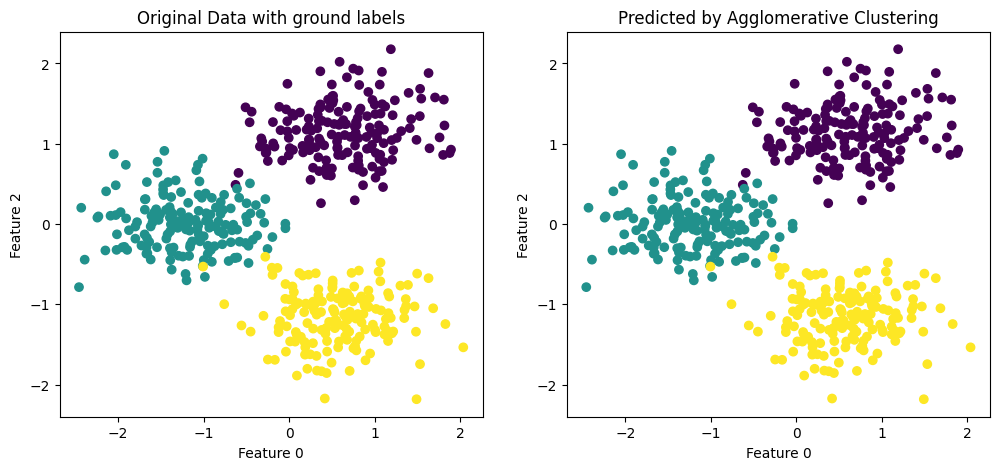

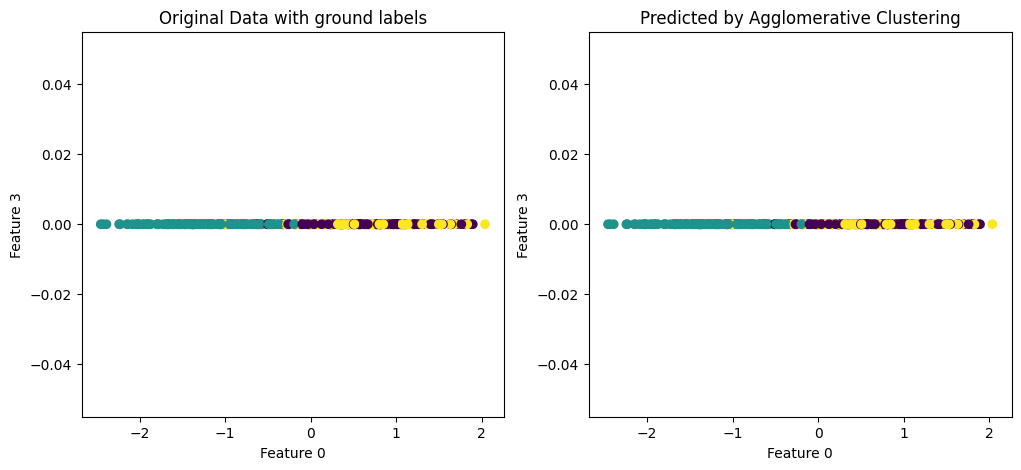

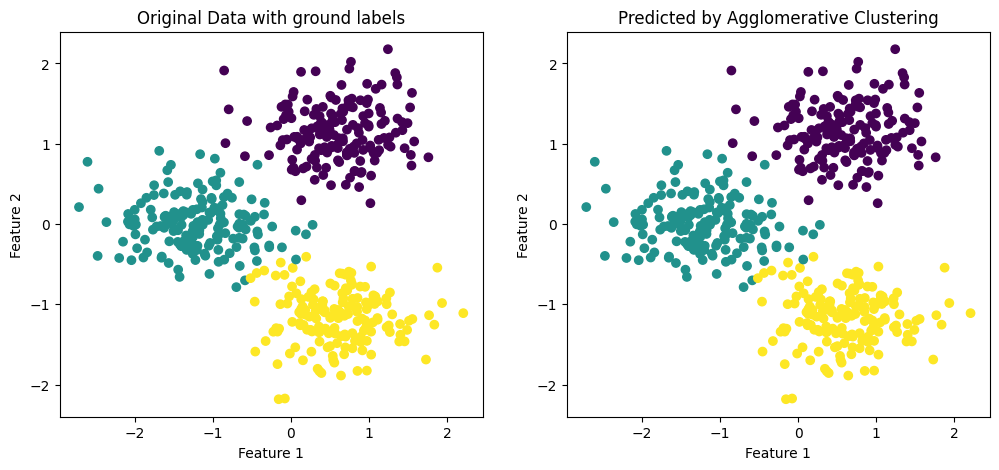

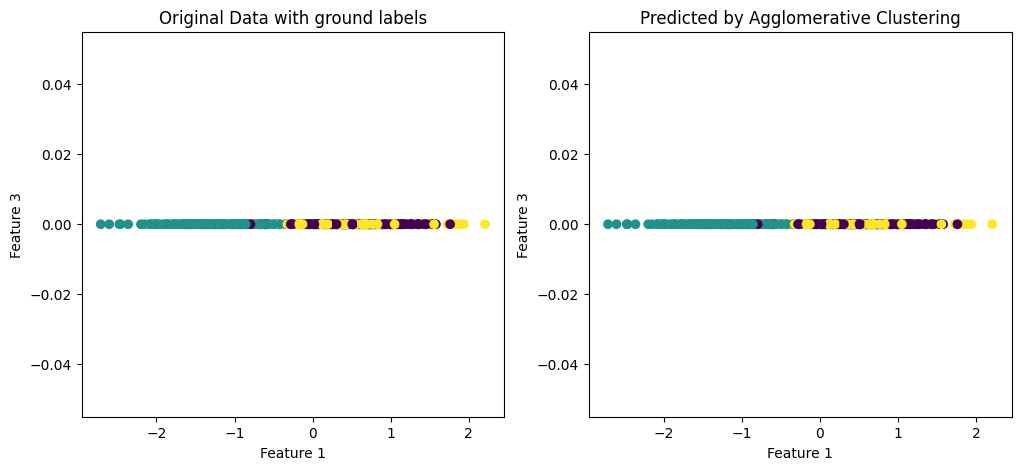

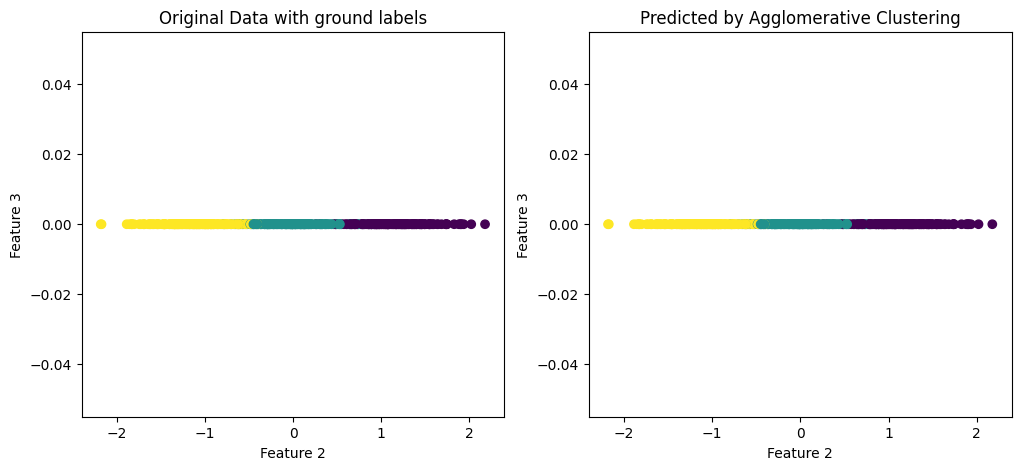

In [599]:
compare_plot(scaled_x,labels,cluster_labels=A[2],title_cluster='Agglomerative Clustering')

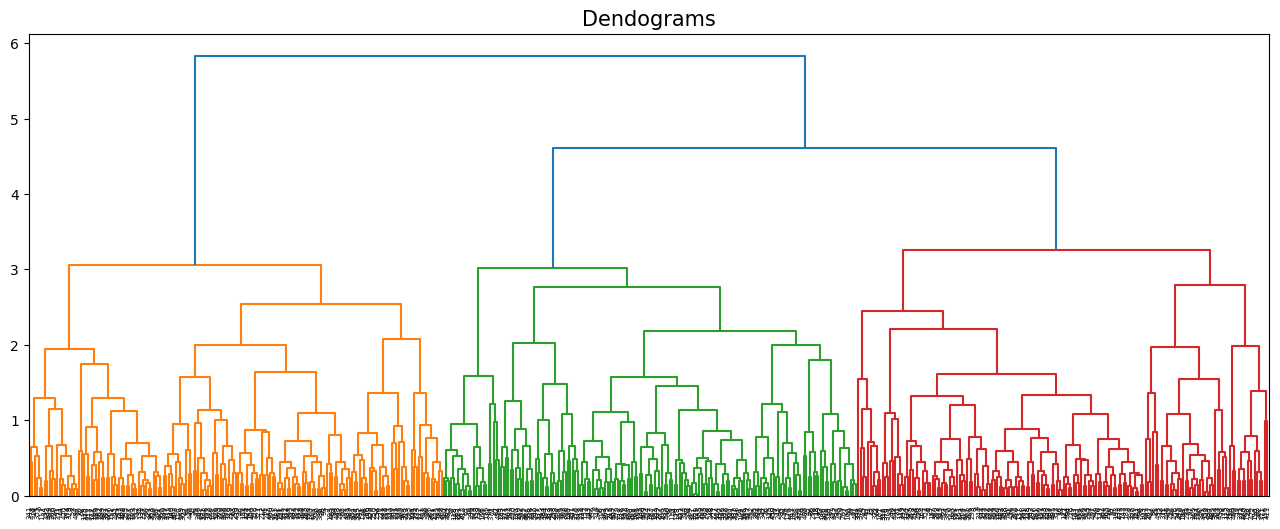

In [600]:
plt.figure(figsize=(16,6))
plt.title("Dendograms",fontsize=15)
Z=shc.linkage(scaled_x,method="complete")
dend=shc.dendrogram(Z)

This also suggests 3 clusters are present in the given data

#DBSCAN

In [601]:
def get_best_cluster_number_db(X,labels):
  R=0
  M=0
  CR=0
  CM=0
  best_labels_R=np.zeros(X.shape[0])
  best_labels_M=np.zeros(X.shape[0])
  e=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]#various epsilon radius
  for i in e:
    db=DBSCAN(eps=i,min_samples=3,metric='euclidean')
    db.fit(X)
    pred_labels=db.labels_
    rand_score=metrics.adjusted_rand_score(labels,pred_labels)
    mutual_info_score=metrics.adjusted_mutual_info_score(labels,pred_labels)
    print(f'For {i} epsilon the rand_score is : {rand_score}')
    print(f'For {i} epsilon the mutual_info_score is : {mutual_info_score}')
    if rand_score>R:
      CR=i
      R=rand_score
      best_labels_R=pred_labels
    if mutual_info_score>M:
      CM=i
      M=mutual_info_score
      best_labels_M=pred_labels
  return (R,CR,best_labels_R),(M,CM,best_labels_M)

In [602]:
C,D=get_best_cluster_number_db(scaled_x,labels=labels)

For 0.1 epsilon the rand_score is : 0.0001504660760463416
For 0.1 epsilon the mutual_info_score is : 0.026225009678618516
For 0.2 epsilon the rand_score is : 0.04977396174948663
For 0.2 epsilon the mutual_info_score is : 0.29413812425436414
For 0.3 epsilon the rand_score is : 0.6746679696725888
For 0.3 epsilon the mutual_info_score is : 0.6944192672135717
For 0.4 epsilon the rand_score is : 0.855901493945305
For 0.4 epsilon the mutual_info_score is : 0.8276158944361047
For 0.5 epsilon the rand_score is : 0.9577815135999573
For 0.5 epsilon the mutual_info_score is : 0.9335191180627351
For 0.6 epsilon the rand_score is : 0.9759934521503237
For 0.6 epsilon the mutual_info_score is : 0.9585671330154851
For 0.7 epsilon the rand_score is : 0.5661551263318177
For 0.7 epsilon the mutual_info_score is : 0.7149041566628729
For 0.8 epsilon the rand_score is : -7.903772152369691e-06
For 0.8 epsilon the mutual_info_score is : -0.0016442859802544261
For 0.9 epsilon the rand_score is : 0.0
For 0.9 ep

## Best score and number of cluster by DBSCAN

In [603]:
print(f'best rand index score {C[0]} and epsilon radius {C[1]}')
print(f'best mutual information score {D[0]} and epsilon radius {D[1]}')

best rand index score 0.9759934521503237 and epsilon radius 0.6
best mutual information score 0.9585671330154851 and epsilon radius 0.6


##Silhouette Score corresponding to labels with max rand_score

In [604]:
s_db=metrics.silhouette_score(scaled_x,C[2])
print(f'Silhouette score : {s_db}')

Silhouette score : 0.5562688222138219


##Plot with Predicted Labels

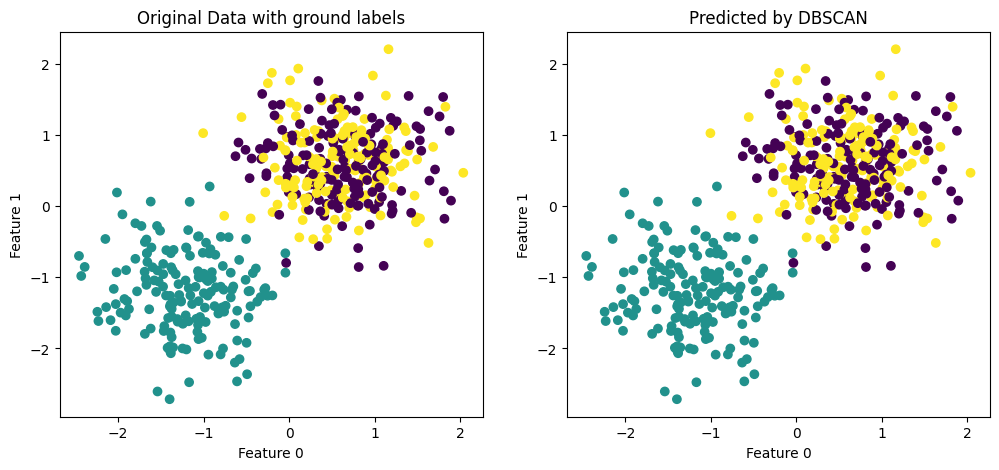

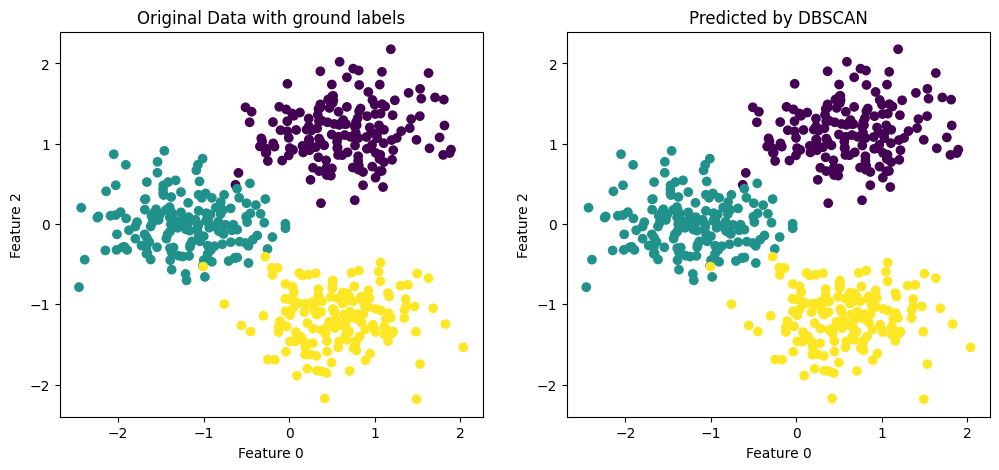

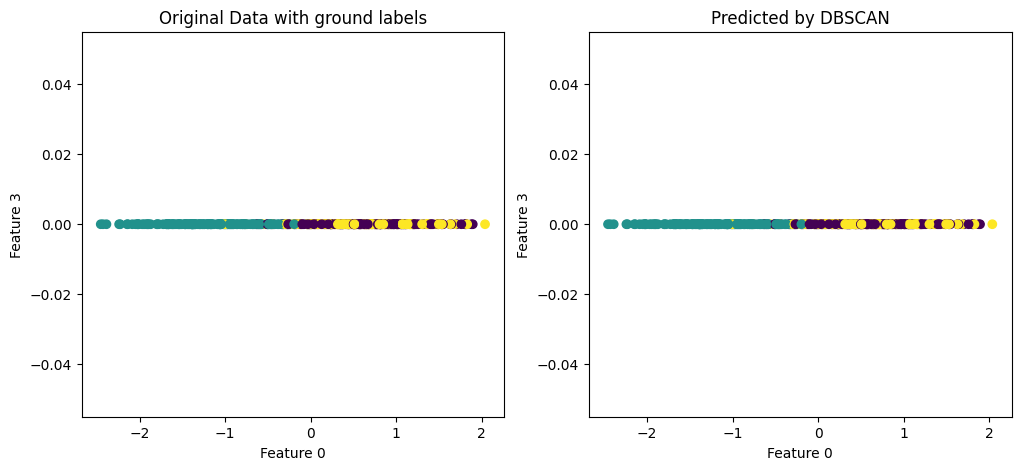

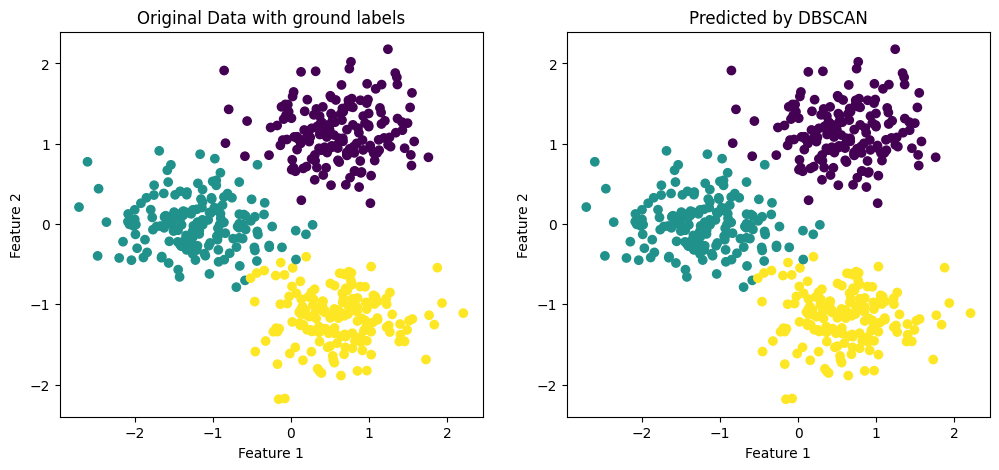

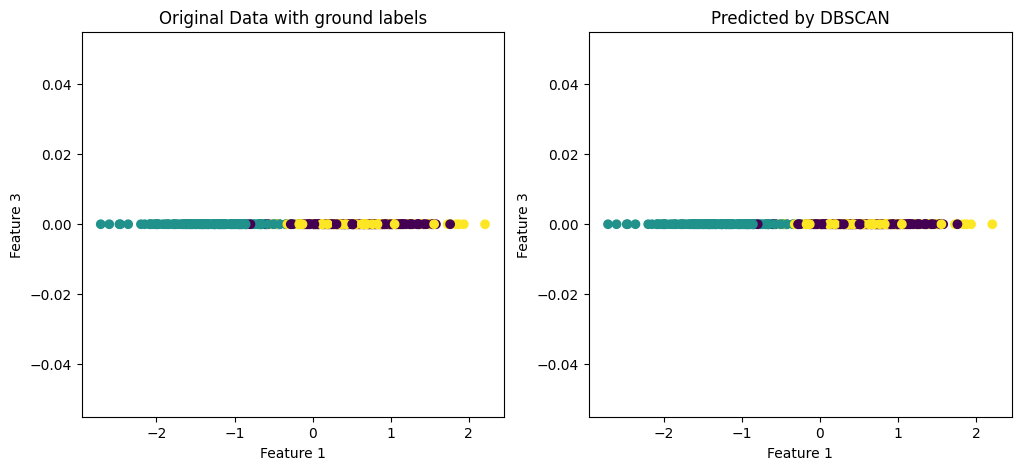

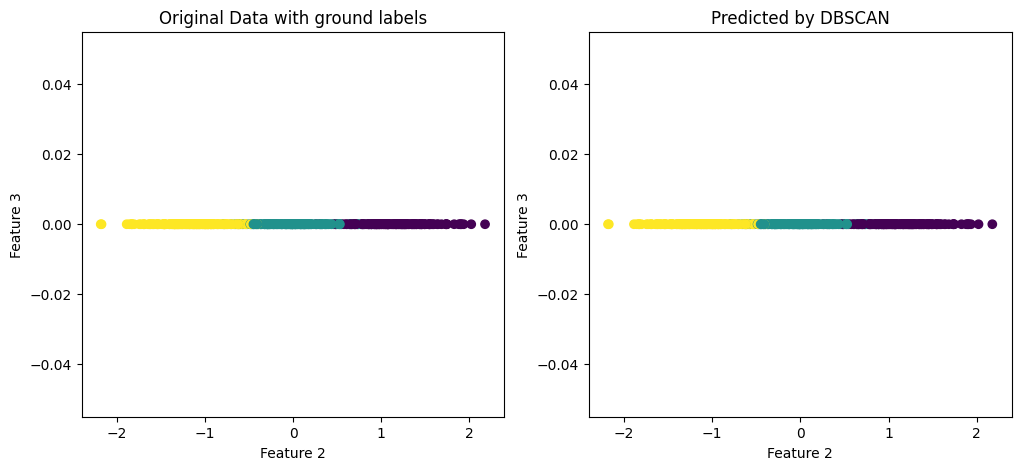

In [605]:
compare_plot(scaled_x,labels,cluster_labels=C[2],title_cluster='DBSCAN')

#Spectral Clustering

In [606]:
def get_best_cluster_number_sc(X,labels,num_clus):
  R=0
  M=0
  CR=0
  CM=0
  best_labels_R=np.zeros(X.shape[0])
  best_labels_M=np.zeros(X.shape[0])
  for i in num_clus:
    SC=SpectralClustering(n_clusters=i,affinity="nearest_neighbors",assign_labels='kmeans')
    SC.fit(X)
    pred_labels=SC.labels_
    rand_score=metrics.adjusted_rand_score(labels,pred_labels)
    mutual_info_score=metrics.adjusted_mutual_info_score(labels,pred_labels)
    print(f'For {i} clusters the rand_score is : {rand_score}')
    print(f'For {i} clusters the mutual_info_score is : {mutual_info_score}')
    if rand_score>R:
      CR=i
      R=rand_score
      best_labels_R=pred_labels
      A=SC.affinity_matrix_
    if mutual_info_score>M:
      CM=i
      M=mutual_info_score
      best_labels_M=pred_labels
  return (R,CR,best_labels_R),(M,CM,best_labels_M),A

In [607]:
E,F,c=get_best_cluster_number_sc(scaled_x,labels,clus)

For 1 clusters the rand_score is : 0.0
For 1 clusters the mutual_info_score is : 0.0
For 2 clusters the rand_score is : 0.5711835334476844
For 2 clusters the mutual_info_score is : 0.7334012369626347
For 3 clusters the rand_score is : 1.0
For 3 clusters the mutual_info_score is : 1.0
For 4 clusters the rand_score is : 0.8720115739236267
For 4 clusters the mutual_info_score is : 0.9058444342815657
For 5 clusters the rand_score is : 0.7364869235348988
For 5 clusters the mutual_info_score is : 0.8288512885673662
For 6 clusters the rand_score is : 0.5959711069669162
For 6 clusters the mutual_info_score is : 0.7659446747638127


In [608]:
print(f'best rand index score {E[0]} and number of clusters is {E[1]}')
print(f'best mutual information score {F[0]} and number of clusters is {F[1]}')

best rand index score 1.0 and number of clusters is 3
best mutual information score 1.0 and number of clusters is 3


##Silhouette Score corresponding to labels with max scores(Rand_Index and Mutual information)

In [609]:
s_ss=metrics.silhouette_score(scaled_x,E[2])
print(f'Silhouette score :  {s_ss}')

Silhouette score :  0.5878535006929564


##Plot with Predicted Labels

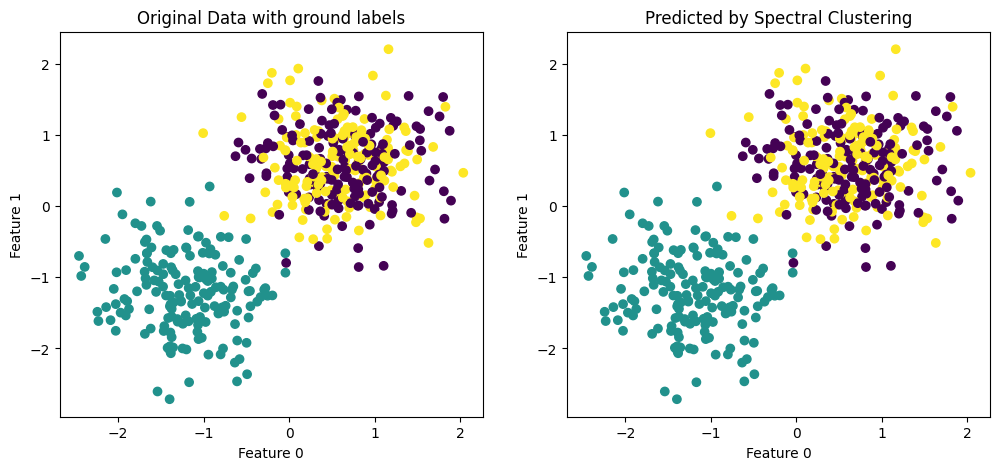

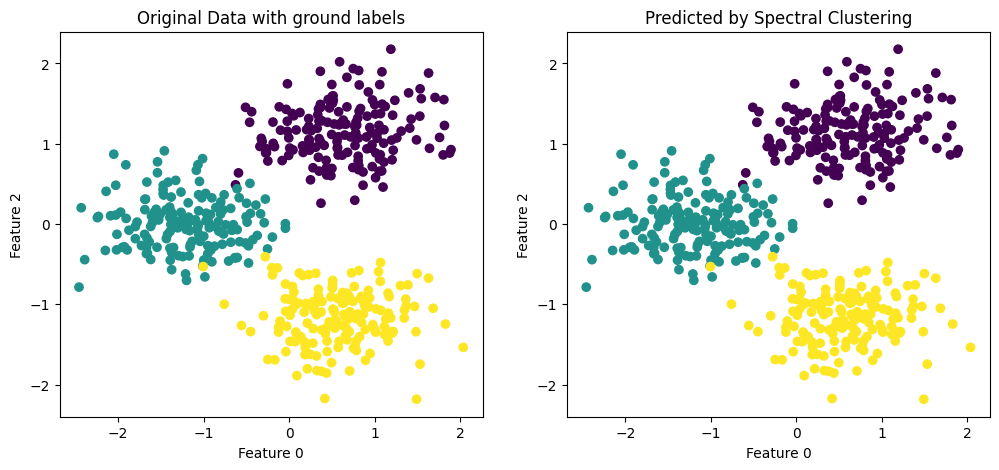

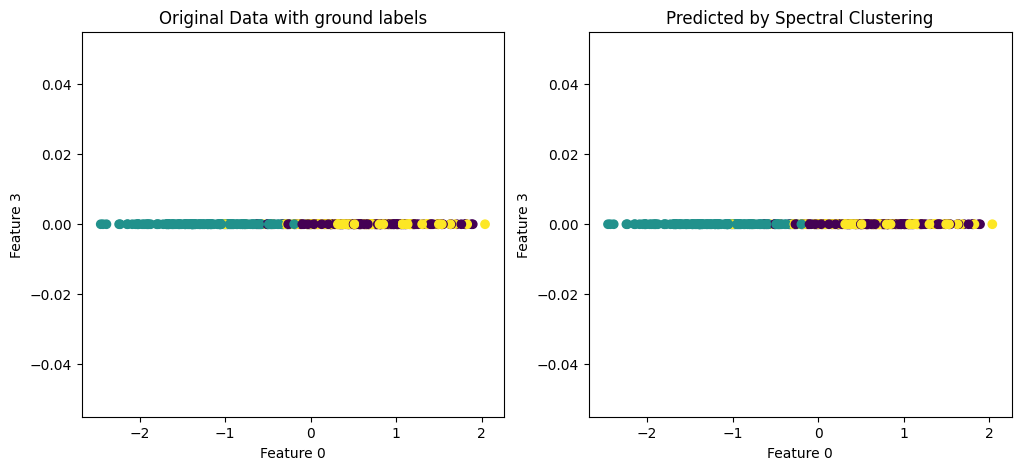

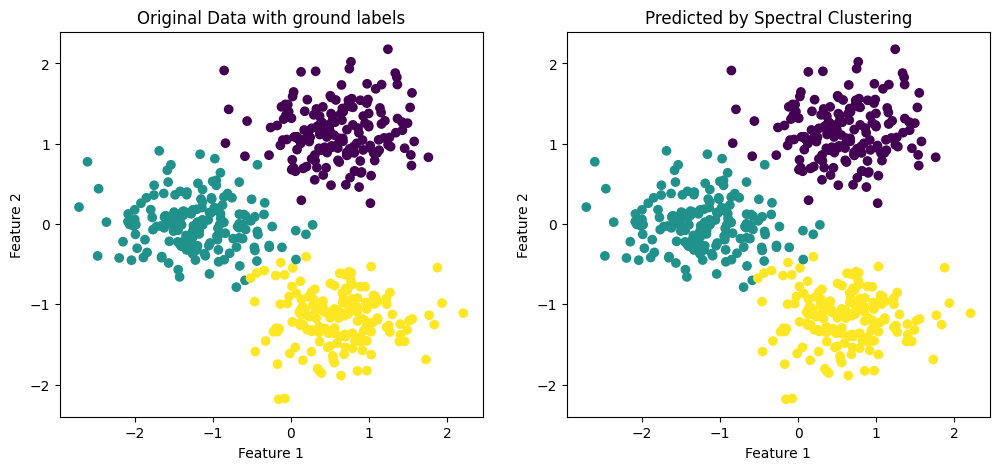

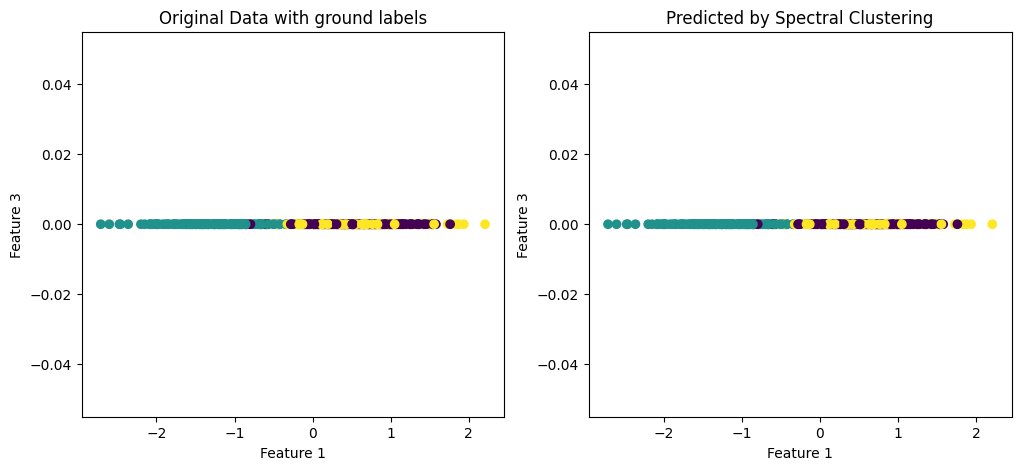

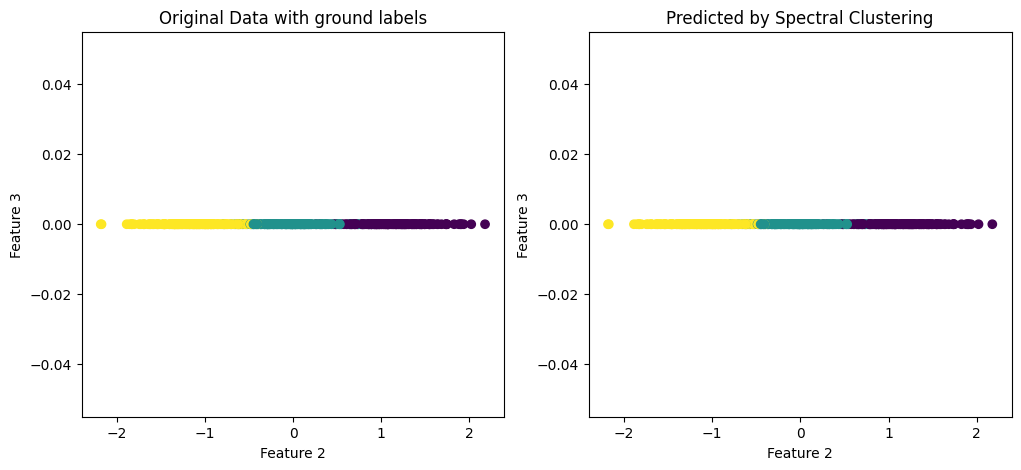

In [610]:
compare_plot(scaled_x,labels,cluster_labels=E[2],title_cluster='Spectral Clustering')

##Eigen values and vectors visualization in reduced dimension

In [611]:
c.shape#affinity matrix dimension

(500, 500)

In [612]:
def get_norm_laplacian(affinity_matrix):
  degree_matrix = np.diag(np.sum(affinity_matrix.toarray(), axis=1))
  laplacian_matrix = degree_matrix - affinity_matrix.toarray()
  norm_laplace=np.matmul(np.linalg.inv(degree_matrix),laplacian_matrix)
  return norm_laplace
def get_eigens(lap,k=10):
  vals, vecs=np.linalg.eig(lap)
  index=np.argsort(vals)
  least_vals=vals[index[:k]]
  vec=vecs[:,index[:k]]
  return np.real(least_vals),np.real(vec)
def plot_eigvals(vals):
  x = np.arange(len(vals))
  plt.scatter(x, vals,marker='o',alpha=0.9,color='r')
  plt.title("First 10 Small Eigenvalues")
  plt.xlabel("Eigenvalue Index")
  plt.ylabel("Eigenvalue Value")
  plt.show()

def plot_eigvecs(vector,num_elems=200,k=5):
  fig,ax=plt.subplots(1,k,figsize=(20,5))
  for i in range(k):
    ax[i].plot(np.arange(num_elems),vector[:num_elems,i])
    ax[i].set_title(f'eigen vector {i}')

In [613]:
L=get_norm_laplacian(c)

In [614]:
val,vec=get_eigens(L,k=10)

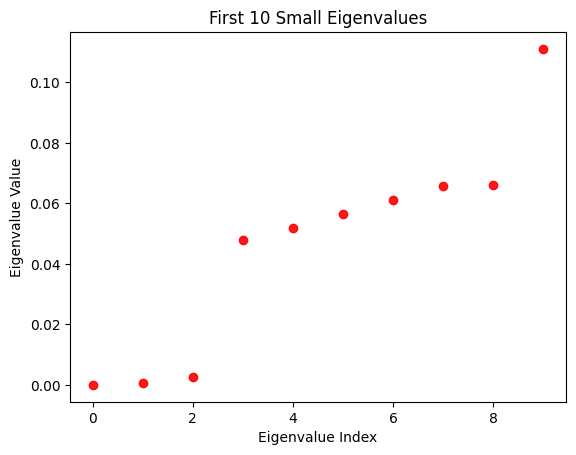

In [615]:
plot_eigvals(np.sort(val))

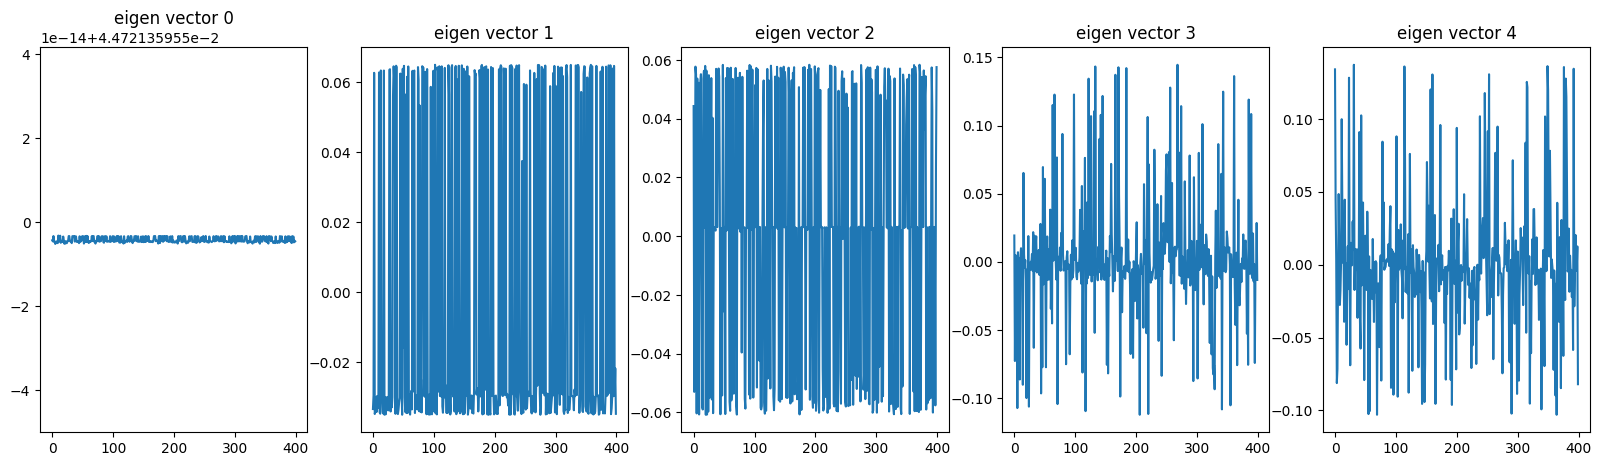

In [616]:
plot_eigvecs(vec,num_elems=400,k=5)

In [617]:
Algos=['Agglomerative Clustering','DBSCAN','Spectral Clustering']
Rand_score=[A[0],C[0],E[0]]
Mutual_info_score=[B[0],D[0],F[0]]
sil_score=[s_hc,s_db,s_ss]
T={'Algorithm':Algos,'best Rand Index':Rand_score,'best Mutual Information':Mutual_info_score,'Silhouette Score':sil_score}
Data=pd.DataFrame(T)
Data.set_index('Algorithm',inplace=True)

In [618]:
Data

,best Rand Index,best Mutual Information,Silhouette Score
Algorithm,,,
Agglomerative Clustering,1.000000,1.000000,0.587854
DBSCAN,0.975993,0.958567,0.556269
Spectral Clustering,1.000000,1.000000,0.587854


In [619]:
Data.to_csv('Result.csv')